<a href="https://colab.research.google.com/github/adriellisantos/adriellisantos.github.io/blob/master/Analise_ExpVinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
data_exp_vinho = pd.read_csv('/content/ExpVinho.csv', sep=';')

In [ ]:
#Criando colunas para os anos e quantidades mantendo a coluna "País" como identificador
dados_vinhos = data_exp_vinho.melt(id_vars=['País'],var_name='anos',value_name='qtd')

In [ ]:
#Filtro removendo as linhas onde a coluna 'anos' contém "id"
dados_vinhos = dados_vinhos[dados_vinhos.anos.str.contains("Id") == False]

In [ ]:
#Adiciona uma nova coluna chamada 'medida' Utiliza uma função lambda para verificar o final do valor da coluna 'anos'
dados_vinhos['medida'] = dados_vinhos.apply(lambda row: 'Valor' if row['anos'][-2:] == '.1' else 'Quantidade', axis=1)

In [ ]:
#Retorna a visualização
dados_vinhos.head()

,País,anos,qtd,medida
137,Afeganistão,1970,0,Quantidade
138,África do Sul,1970,0,Quantidade
139,"Alemanha, República Democrática",1970,0,Quantidade
140,Angola,1970,0,Quantidade
141,Anguilla,1970,0,Quantidade


In [ ]:
#Substitui os valores nulo do DataFrame original por 0 e visualiza o DataFrame
dados_vinhos.fillna(0, inplace=True)
dados

,País,anos,qtd,medida
137,Afeganistão,1970,0,Quantidade
138,África do Sul,1970,0,Quantidade
139,"Alemanha, República Democrática",1970,0,Quantidade
140,Angola,1970,0,Quantidade
141,Anguilla,1970,0,Quantidade
...,...,...,...,...
14928,Tuvalu,2023.1,0,Valor
14929,Uruguai,2023.1,454271,Valor
14930,Vanuatu,2023.1,0,Valor
14931,Venezuela,2023.1,220512,Valor


In [ ]:
#Cria um novo dataframe 'quantidades' com o filtro de 'dados' para incluir apenas as linhas onde a coluna 'medida' contém "quantidade" e visualiza o novo df 'quantidades'
quantidades_vinho = dados_vinhos[dados_vinhos.medida.str.contains("Quantidade") == True]
quantidades_vinho

,País,anos,qtd,medida
137,Afeganistão,1970,0,Quantidade
138,África do Sul,1970,0,Quantidade
139,"Alemanha, República Democrática",1970,0,Quantidade
140,Angola,1970,0,Quantidade
141,Anguilla,1970,0,Quantidade
...,...,...,...,...
14791,Tuvalu,2023,0,Quantidade
14792,Uruguai,2023,326093,Quantidade
14793,Vanuatu,2023,0,Quantidade
14794,Venezuela,2023,141030,Quantidade


In [ ]:
#Coloca a coluna "País" como índice do DataFrame e visualiza o DataFrame
quantidades_vinho = quantidades_vinho.set_index('País')
quantidades_vinho

,anos,qtd,medida
País,,,
Afeganistão,1970,0,Quantidade
África do Sul,1970,0,Quantidade
"Alemanha, República Democrática",1970,0,Quantidade
Angola,1970,0,Quantidade
Anguilla,1970,0,Quantidade
...,...,...,...
Tuvalu,2023,0,Quantidade
Uruguai,2023,326093,Quantidade
Vanuatu,2023,0,Quantidade


In [ ]:
#Converte os valores da coluna 'anos' para o tipo int e filtra os dados para incluir apenas os anos após 2007 e exibe o dataframe
quantidades_vinho['anos'] = quantidades_vinho['anos'].astype(int)
quantidades_vinho = quantidades_vinho[quantidades_vinho.anos > 2007]
quantidades_vinho

,anos,qtd,medida
País,,,
Afeganistão,2008,0,Quantidade
África do Sul,2008,0,Quantidade
"Alemanha, República Democrática",2008,265742,Quantidade
Angola,2008,25721,Quantidade
Anguilla,2008,0,Quantidade
...,...,...,...
Tuvalu,2023,0,Quantidade
Uruguai,2023,326093,Quantidade
Vanuatu,2023,0,Quantidade


In [ ]:
#Criando uma tabela dinâmica para reorganizar os dados:
quantidades_vinho = quantidades_vinho.pivot_table(values='qtd', index=quantidades_vinho.index, columns='anos', aggfunc='first')

In [ ]:
# Adicionando uma nova linha chamada 'Total' ao DataFrame. Soma os valores de todas as colunas considerando apenas as colunas númericas
quantidades_vinho.loc['Total'] = quantidades_vinho.sum(numeric_only=True)

In [ ]:
#Exibindo as últimas linhas do Dataframe
quantidades_vinho.tail()

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,
Venezuela,0,0,0,0,1029,0,14,0,0,680,71,0,4086,26415,23220,141030
Vietnã,0,743,8820,0,0,0,0,0,0,0,0,20,86,0,130,72
África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117
Áustria,0,0,0,0,0,0,0,0,675,0,0,0,0,0,6,0
Total,10346323,25514198,1280574,1214834,5775376,9149059,2324029,1198479,1786549,2889572,3856162,3152873,4409717,8058704,7025983,5538888


In [ ]:
# Criando um novo DataFrame `total_por_ano` que contém os valores totais de vinho importado por ano e exibe o novo DataFrame
total_importado_por_ano = pd.DataFrame(quantidades_vinho.loc['Total'])
total_importado_por_ano.head()

,Total
anos,
2008,10346323
2009,25514198
2010,1280574
2011,1214834
2012,5775376


In [ ]:
# Calculando o total de vinho importado nos últimos 15 anos somando os valores da coluna 'Total' e exibindo
total_importado_nos_15_anos = total_importado_por_ano['Total'].sum()
total_importado_nos_15_anos

93521320

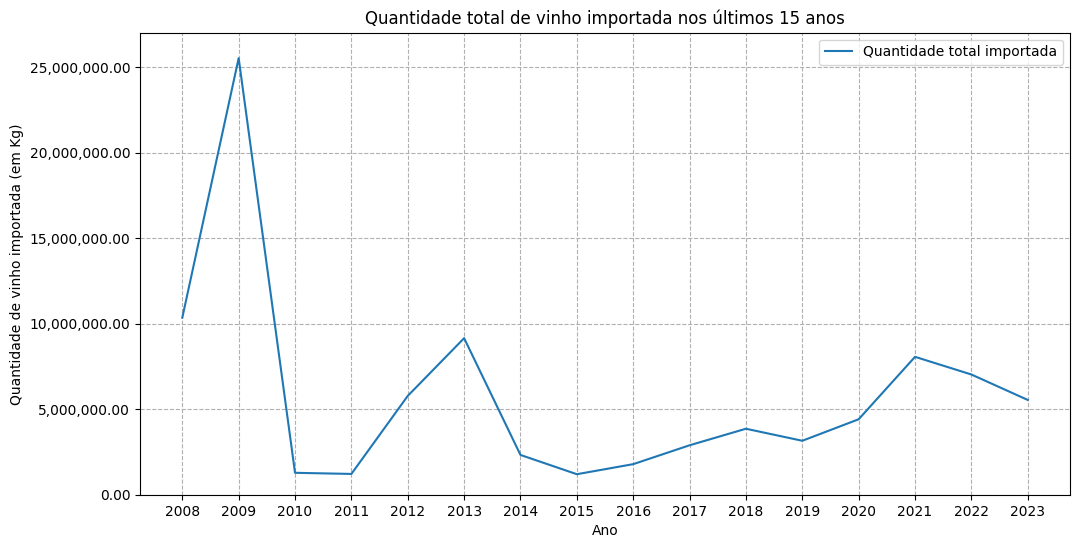

In [ ]:
#Plota um gráfico de linha (`line`) para mostrar a quantidade total de vinho importada por ano e configura o tamanho do gráfico e define os rótulos do eixo y e x
axis = total_importado_por_ano.plot(kind="line", figsize=(12,6), ylabel='Quantidade de vinho importada (em Kg)', xlabel="Ano")

#Formatando os valores do eixo y
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#Definindo os rótulos do eixo x
axis.set_xticks(total_importado_por_ano.index)

#Adicionando uma legenda ao gráfico
axis.legend(['Quantidade total importada'])

#Definindo o título do gráfico.
plt.title("Quantidade total de vinho importada nos últimos 15 anos")

#Configurando os limites do eixo y
plt.ylim(0, 27000000)

#Adicionando uma grade ao fundo
plt.grid(linestyle='--')

#Exibindo o gráfico
plt.show()

In [ ]:
# Removendo a linha 'Total' do DataFrame e exibindo o DataFrame
quantidades_vinho = quantidades_vinho.drop('Total', axis=0)
quantidades_vinho

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0
"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806
Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Antilhas Holandesas,17938,8235,9810,7335,9247,11281,4455,6660,16641,5400,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0
Venezuela,0,0,0,0,1029,0,14,0,0,680,71,0,4086,26415,23220,141030
Vietnã,0,743,8820,0,0,0,0,0,0,0,0,20,86,0,130,72


In [ ]:
# Calculando o total de vinho importado por país e adicionando uma nova coluna chamada 'Total' no DataFrame.
quantidades_vinho['Total'] = quantidades_vinho.sum(axis=1)
quantidades_vinho

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,11
"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,913857
Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,168868
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Antilhas Holandesas,17938,8235,9810,7335,9247,11281,4455,6660,16641,5400,0,0,0,0,0,0,97002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,18
Venezuela,0,0,0,0,1029,0,14,0,0,680,71,0,4086,26415,23220,141030,196545
Vietnã,0,743,8820,0,0,0,0,0,0,0,0,20,86,0,130,72,9871


In [ ]:
#Ordenando o DataFrame em ordem decrescente com base na coluna 'Total' e colocando os países com maior importação no topo
quantidades_vinho = quantidades_vinho.sort_values('Total', ascending=False)
quantidades_vinho

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,0,39029799
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378,32995148
Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,229839,3793194
China,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,73917,2583375
Haiti,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,553503,559645,2351248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tanzânia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Iraque,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ilhas Virgens,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Exibindo os top 10 países com maiores exportação de vinhos nos últimos 15 anos
quantidades_vinho.head(10)

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,0,39029799
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378,32995148
Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,229839,3793194
China,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,73917,2583375
Haiti,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,553503,559645,2351248
Espanha,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540,28,0,0,180,1993180
Reino Unido,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295,22913,25316,18835,11326,1250877
Países Baixos,340412,171654,87368,125414,134879,57792,165289,44987,42953,0,9451,44882,248,3791,7034,2244,1238398
Japão,232293,217974,112178,100835,29281,91988,106426,31597,34341,33909,36992,40621,36442,39491,37324,22942,1204634


In [ ]:
#Criando um novo DataFrame `quantidade_total_importado` que contém apenas os países e o total importado. Redefindo o índice para utilizar índices números
quantidade_total_importado = quantidades_vinho[['Total']]
quantidade_total_importado = quantidade_total_importado.reset_index()
#Renomendo as colunas do DataFrame para "País" e "Total" e exibe o DataFrame
quantidade_total_importado.columns = ['País', 'Total']
quantidade_total_importado

,País,Total
0,Rússia,39029799
1,Paraguai,32995148
2,Estados Unidos,3793194
3,China,2583375
4,Haiti,2351248
...,...,...
132,Tanzânia,0
133,Iraque,0
134,Ilhas Virgens,0
135,República Dominicana,0


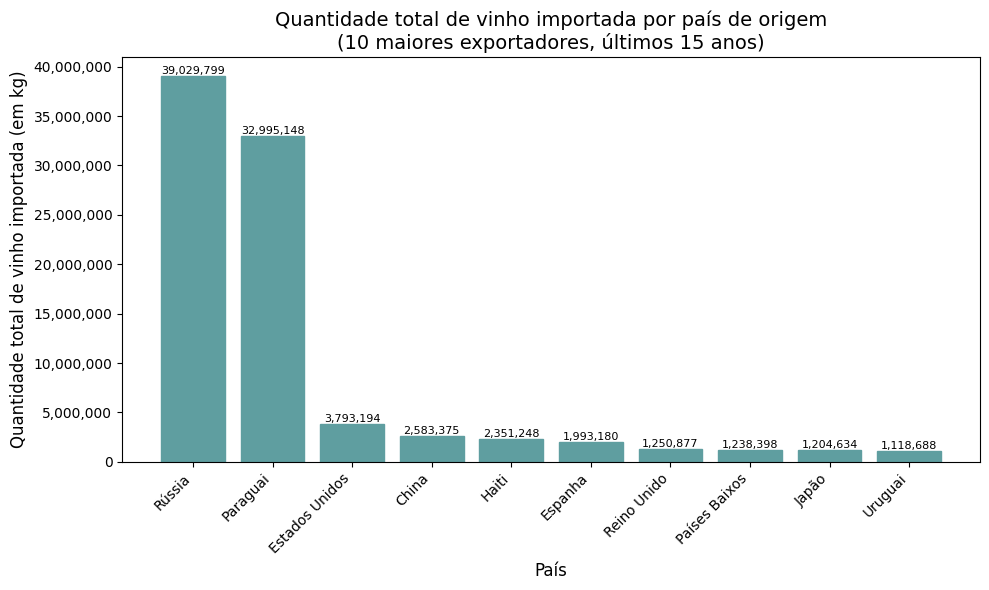

In [ ]:
# Configurando o tamanho do gráfico e criando gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(quantidade_total_importado["País"].head(10),quantidade_total_importado['Total'].head(10), color="cadetblue", edgecolor="cadetblue")

#Adicionando os valores sobre as barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,}", ha='center', va='bottom', fontsize=8)

# Adicionando título e rótulos aos eixos
plt.title("Quantidade total de vinho importada por país de origem\n(10 maiores exportadores, últimos 15 anos)", fontsize=14)
plt.ylabel("Quantidade total de vinho importada (em kg)", fontsize=12)
plt.xlabel("País", fontsize=12)

#Ajustando os rótulos do eixo X
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Removendo a coluna 'Total' do DataFrame 'quantidades' e cria um novo DataFrame chamado 'maiores_importadores'
maiores_importadores = quantidades_vinho.drop('Total',axis='columns')
maiores_importadores

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,0
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378
Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,229839
China,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,73917
Haiti,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,553503,559645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tanzânia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Iraque,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ilhas Virgens,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


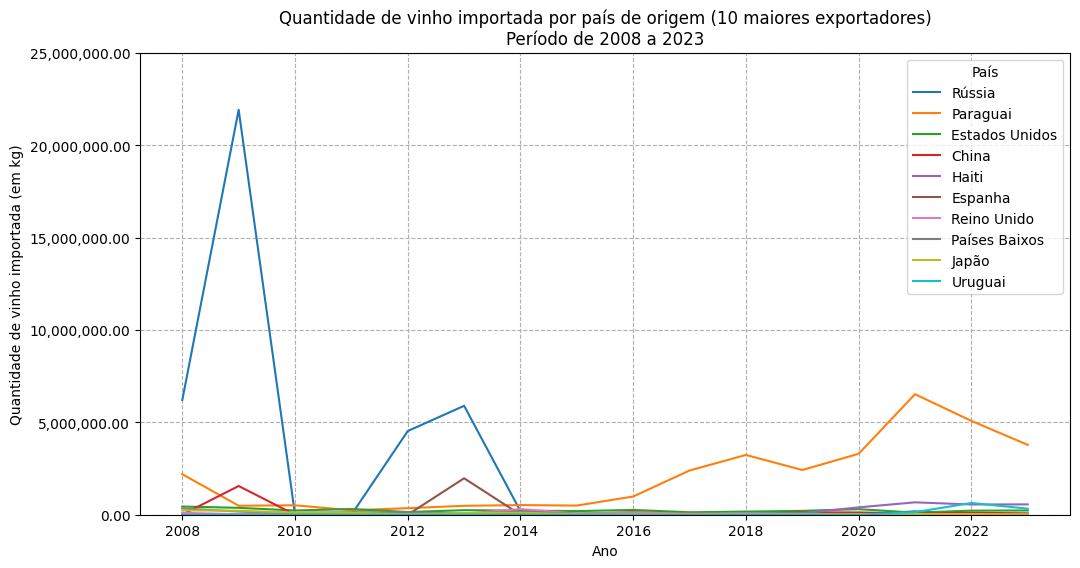

In [ ]:
#Gerando o gráfico com os dados transpostos
axis = maiores_importadores.head(10).T.plot(kind="line", figsize=(12,6), xlabel="Ano", ylabel="Quantidade de vinho importada (em kg)")

#Formatando os valores do eixo y
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#Configurando os limites do eixo y
plt.ylim([0, 25000000])

#Adicionando o título ao gráfico
plt.title("Quantidade de vinho importada por país de origem (10 maiores exportadores)\nPeríodo de 2008 a 2023")

#Adicionando uma grade ao fundo
plt.grid(linestyle='--')

plt.show()

In [ ]:
#Exibindo os principais países da tabela
maiores_importadores.head()

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,
Rússia,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,66046,0
Paraguai,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,5076670,3780378
Estados Unidos,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,220373,229839
China,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,105395,73917
Haiti,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379,553503,559645


In [ ]:
#Filtrando os dados onde a coluna 'medida' contém "Valor" e criando um novo dataFrame
valores_imp = dados_vinhos[dados_vinhos.medida.str.contains("Valor") == True]
valores_imp

,País,anos,qtd,medida
274,Afeganistão,1970.1,0,Valor
275,África do Sul,1970.1,0,Valor
276,"Alemanha, República Democrática",1970.1,0,Valor
277,Angola,1970.1,0,Valor
278,Anguilla,1970.1,0,Valor
...,...,...,...,...
14928,Tuvalu,2023.1,0,Valor
14929,Uruguai,2023.1,454271,Valor
14930,Vanuatu,2023.1,0,Valor
14931,Venezuela,2023.1,220512,Valor


In [ ]:
#Extraindo os 4 primeiros caracteres da coluna 'anos'
valores_imp['anos'] = valores_imp['anos'].str.slice(start=0, stop=4)
valores_imp

<ipython-input-101-5e158bb61d44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['anos'] = valores['anos'].str.slice(start=0, stop=4)


,País,anos,qtd,medida
274,Afeganistão,1970,0,Valor
275,África do Sul,1970,0,Valor
276,"Alemanha, República Democrática",1970,0,Valor
277,Angola,1970,0,Valor
278,Anguilla,1970,0,Valor
...,...,...,...,...
14928,Tuvalu,2023,0,Valor
14929,Uruguai,2023,454271,Valor
14930,Vanuatu,2023,0,Valor
14931,Venezuela,2023,220512,Valor


In [ ]:
#Definindo a coluna 'País' como índice do DataFrame
valores = valores.set_index('País')
valores

,anos,qtd,medida
País,,,
Afeganistão,1970,0,Valor
África do Sul,1970,0,Valor
"Alemanha, República Democrática",1970,0,Valor
Angola,1970,0,Valor
Anguilla,1970,0,Valor
...,...,...,...
Tuvalu,2023,0,Valor
Uruguai,2023,454271,Valor
Vanuatu,2023,0,Valor


In [ ]:
#Convertendo a coluna 'anos' de string para inteiro e filtra para incluir apenas a partir de 2007
valores_imp['anos'] = valores_imp['anos'].astype(int)
valores_imp = valores_imp[valores_imp.anos > 2007]
valores_imp

,anos,qtd,medida
País,,,
Afeganistão,2008,0,Valor
África do Sul,2008,0,Valor
"Alemanha, República Democrática",2008,429970,Valor
Angola,2008,71083,Valor
Anguilla,2008,0,Valor
...,...,...,...
Tuvalu,2023,0,Valor
Uruguai,2023,454271,Valor
Vanuatu,2023,0,Valor


In [ ]:
#Transformando o dF em uma tabela pivô
valores_imp = valores_imp.pivot_table(values='qtd', index=valores.index, columns='anos', aggfunc='first')

In [ ]:
#Adicionando uma nova coluna 'Total' ao DataFrame, calculando a soma dos valores por linha
valores_imp['Total'] = valores_imp.sum(axis=1)
valores_imp

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,46
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,2578247
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,576189
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Antilhas Holandesas,22908,10651,12808,10188,14081,19565,7169,10545,26450,8550,0,0,0,0,0,0,142915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,31
Venezuela,0,0,0,0,7492,0,232,0,0,2646,355,0,9808,35944,32351,220512,309340
Vietnã,0,2143,9977,0,0,0,0,0,0,0,0,32,584,0,277,128,13141


In [ ]:
#Ordenando o DataFrame em ordem decrescente com base na coluna 'Total'
valores_imp = valores_imp.sort_values('Total', ascending=False)
valores_imp

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,5517263,44236294
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,0,25504484
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,429091,10113658
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,183096,4929621
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,84547,4796011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ilhas Virgens,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Líbano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Costa do Marfim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Exibindo os 10 primeiros valores
valores_imp.head(10)

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,5517263,44236294
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,0,25504484
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,429091,10113658
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,183096,4929621
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,84547,4796011
Espanha,6834,4050,0,24618,0,3748940,0,0,0,0,22631,1353,126,0,0,4171,3812723
Países Baixos,783635,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031,1532,8484,37240,4958,3796569
Haiti,20,5863,3750,0,0,0,0,0,0,0,144425,129803,471152,831181,741014,871661,3198869
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,2578247


In [ ]:
#Criando um novo DataFrame que contém apenas os países e o total. Redefindo o índice para utilizar índices números
total_importado = valores_imp[['Total']]
total_importado = total_importado.reset_index()
#Renomendo as colunas do DataFrame para "País" e "Total" e exibe o DataFrame
total_importado.columns = ['País', 'Total']
total_importado

,País,Total
0,Paraguai,44236294
1,Rússia,25504484
2,Estados Unidos,10113658
3,China,4929621
4,Reino Unido,4796011
...,...,...
132,Ilhas Virgens,0
133,Líbano,0
134,Costa do Marfim,0
135,Anguilla,0


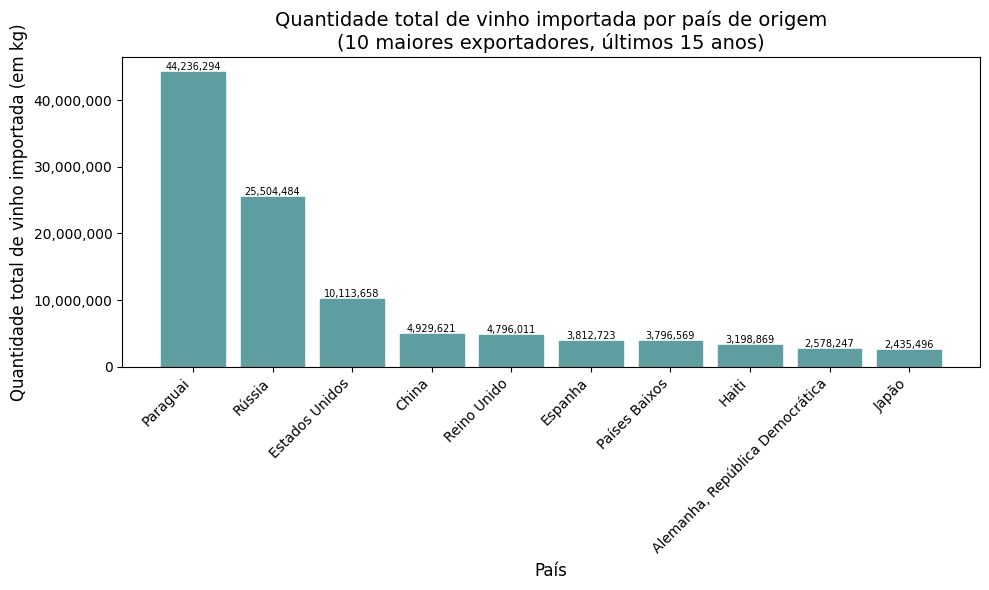

In [120]:
# Configurando o tamanho do gráfico e criando gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(total_importado["País"].head(10),total_importado['Total'].head(10), color="cadetblue", edgecolor="cadetblue")

#Adicionando os valores sobre as barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,}", ha='center', va='bottom', fontsize=7)

# Adicionando título e rótulos aos eixos
plt.title("Quantidade total de vinho importada por país de origem\n(10 maiores exportadores, últimos 15 anos)", fontsize=14)
plt.ylabel("Quantidade total de vinho importada (em kg)", fontsize=12)
plt.xlabel("País", fontsize=12)

#Ajustando os rótulos do eixo X
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Removendo a coluna 'Total' do 'valores_imp' para criar um novo DataFrame 'maiores_importadores_valores'
maiores_importadores_valores = valores_imp.drop('Total',axis='columns')
maiores_importadores_valores

anos,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,
Paraguai,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,7156293,5517263
Rússia,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,118618,0
Estados Unidos,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,447893,429091
China,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,404647,183096
Reino Unido,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,138154,84547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ilhas Virgens,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Líbano,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Costa do Marfim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


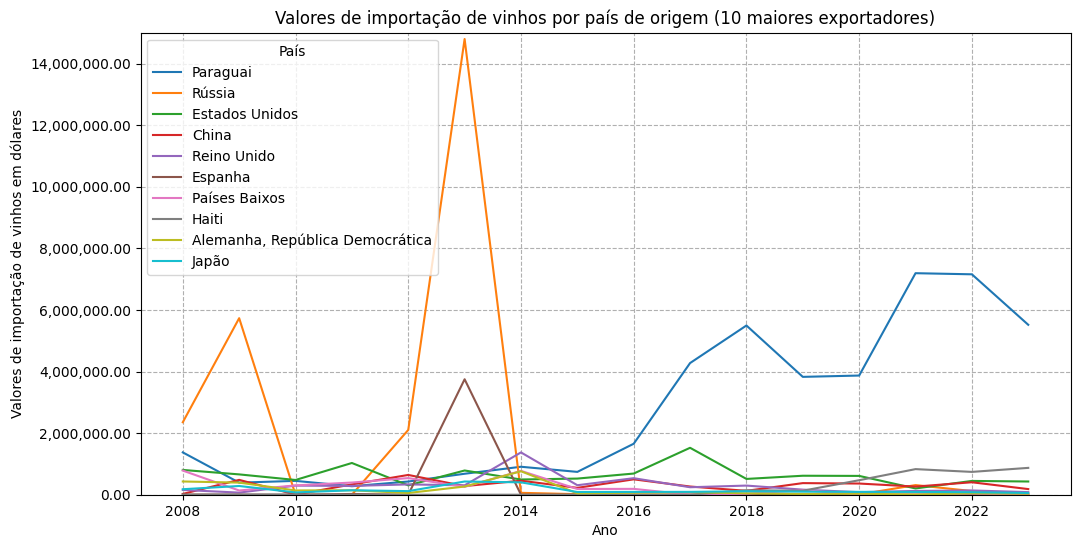

In [ ]:
#Gerando o gráfico com os dados transpostos
axis = maiores_importadores_valores.head(10).T.plot(kind="line", figsize=(12,6), xlabel="Ano", ylabel="Valores de importação de vinhos em dólares")

#Formatando os valores do eixo y
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#Configurando os limites do eixo y
plt.ylim([0, 15000000])

#Adicionando o título ao gráfico
plt.title("Valores de importação de vinhos por país de origem (10 maiores exportadores)")

#Adicionando uma grade ao fundo
plt.grid(linestyle='--')

#Exibindo o gráfico
plt.show()
